In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV

In [2]:
from google.colab import files
data_to_load = files.upload()

Saving train_clean.csv to train_clean.csv
Saving predict_clean.csv to predict_clean.csv


In [4]:
import io
dataset_train = pd.read_csv(io.BytesIO(data_to_load['train_clean.csv']))
dataset_predic = pd.read_csv(io.BytesIO(data_to_load['predict_clean.csv']))

In [33]:
parameters = { 
                'bootstrap': [True, False],  #explicacion bootstrap:https://stackoverflow.com/questions/54529928/does-bootstrap-features-parameter-is-useful-if-i-use-max-features-parameter-in-r
                'n_estimators': [100,200, 300],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [20,40,60]
                }

parameters_GBR={ 
                'n_estimators': [100,200, 300],
                'max_features': ['auto', 'sqrt', 'log2'],
                'max_depth' : [20,40,60]}

In [34]:
X_train, X_test, y_train, y_test  = train_test_split(dataset_train.drop(columns="price"),dataset_train.price, test_size=0.2)
train_split=[X_train, X_test, y_train, y_test ]

In [36]:

#GS para RandomForestRegressor
rfc = RandomForestRegressor()
grid_RandomForestRegressor = GridSearchCV(estimator=rfc,param_grid=parameters,verbose=1,n_jobs=-1,cv=5,return_train_score=True)
grid_RandomForestRegressor.fit(X_train,y_train)


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 25.6min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 36.4min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [37]:
#GS para GradientBoostingRegressor
rfc = GradientBoostingRegressor()
grid_GradientBoostingRegressor = GridSearchCV(estimator=rfc,param_grid=parameters_GBR,verbose=1,n_jobs=-1,cv=5,return_train_score=True)
grid_GradientBoostingRegressor.fit(X_train,y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed: 17.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=100,
                                                 n_iter_no_change=None,
                 

In [38]:
#GS para ExtraTreesRegressor
rfc = ExtraTreesRegressor()
grid_ExtraTreesRegressor = GridSearchCV(estimator=rfc,param_grid=parameters,verbose=1,n_jobs=-1,cv=5,return_train_score=True)
grid_ExtraTreesRegressor.fit(X_train,y_train)



Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  2.2min
/usr/local/lib/python3.6/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done 270 out of 270 | elapsed: 17.3min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0,
                                           criterion='mse', max_depth=None,
                                           max_features='auto',
                                           max_leaf_nodes=None,
                                           max_samples=None,
                                           min_impurity_decrease=0.0,
                                           min_impurity_split=None,
                                           min_samples_leaf=1,
                                           min_samples_split=2,
                                           min_weight_fraction_leaf=0.0,
                                           n_estimators=100, n_jobs=None,
                                           oob_score=False, random_state=None,
                                           verbose=0, warm_start=False),
             iid='deprecated', n_jobs=-1,
             param

In [41]:
def plot_search_results(grid,name):
    """
    Params: 
        grid: A trained GridSearchCV object.
    """
    ## Results from grid search
    results = grid.cv_results_
    means_test = results['mean_test_score']
    stds_test = results['std_test_score']
    means_train = results['mean_train_score']
    stds_train = results['std_train_score']

    ## Getting indexes of values per hyper-parameter
    masks=[]
    masks_names= list(grid.best_params_.keys())
    for p_k, p_v in grid.best_params_.items():
        masks.append(list(results['param_'+p_k].data==p_v))

    params=grid.param_grid

    ## Ploting results
    fig, ax = plt.subplots(1,len(params),sharex='none', sharey='all',figsize=(20,5))
    fig.suptitle(f'Score per parameter, {name}')
    fig.text(0.04, 0.5, 'MEAN SCORE', va='center', rotation='vertical')
    pram_preformace_in_best = {}
    for i, p in enumerate(masks_names):
        m = np.stack(masks[:i] + masks[i+1:])
        pram_preformace_in_best
        best_parms_mask = m.all(axis=0)
        best_index = np.where(best_parms_mask)[0]
        x = np.array(params[p])
        y_1 = np.array(means_test[best_index])
        e_1 = np.array(stds_test[best_index])
        y_2 = np.array(means_train[best_index])
        e_2 = np.array(stds_train[best_index])
        ax[i].errorbar(x, y_1, e_1, linestyle='--', marker='o', label='test')
        ax[i].errorbar(x, y_2, e_2, linestyle='-', marker='^',label='train' )
        ax[i].set_xlabel(p.upper())

    plt.legend()
    plt.show()

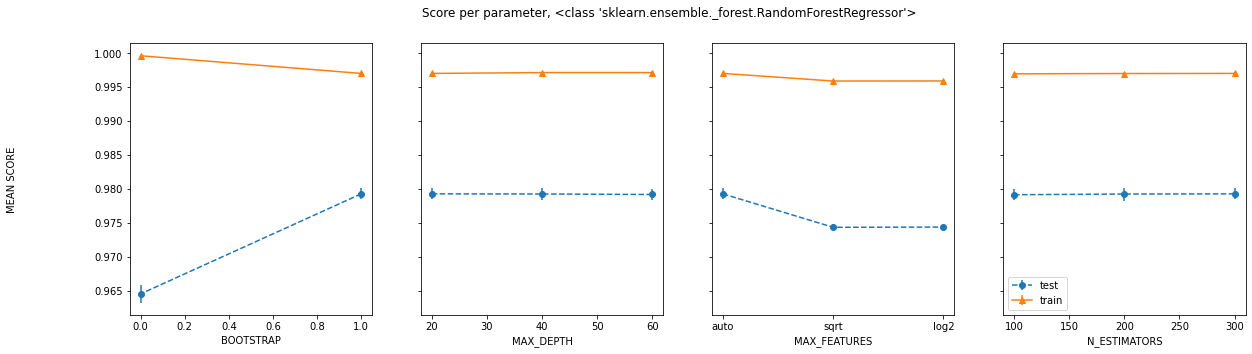

In [42]:
plot_search_results(grid_RandomForestRegressor,RandomForestRegressor)

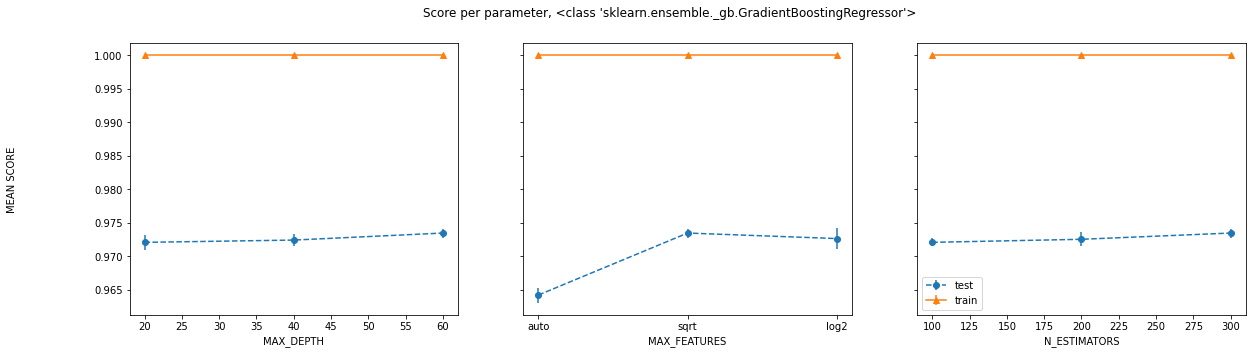

In [43]:
plot_search_results(grid_GradientBoostingRegressor,GradientBoostingRegressor)

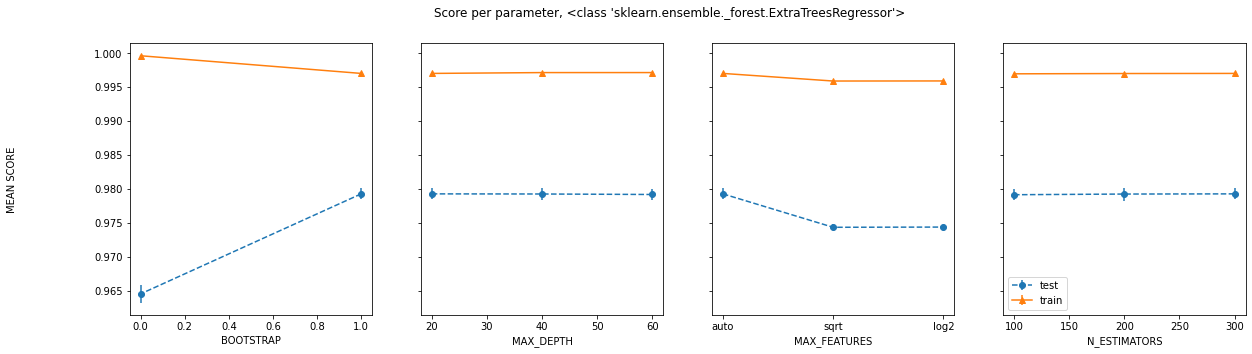

In [44]:
plot_search_results(grid_RandomForestRegressor,ExtraTreesRegressor)